In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
'''출처 : https://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb'''

'출처 : https://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb'

In [3]:
def centroid_histogram(clt):
    '''
    # grab the number of different clusters and create a histogram
    히스토그램 형식으로 색을 반환
    based on the number of pixels assigned to each cluster
    각 클러스터의 픽셀의 숫자를 기반으로 함
    '''
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()  # hist = hist/hist.sum()

    # return the histogram
    return hist

In [4]:
def plot_colors(hist, centroids):
    '''
    initialize the bar chart representing the relative frequency of each of the colors
    각 색의 빈도를 나타내는 바 차트를 초기화
    '''
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [5]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    # image의 shape을 찍어보면, height, width, channel 순으로 나옴
    # channel은 RGB를 말함
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # cv에서는 RGB가 아닌 BGR 순으로 나오기 때문에 순서를 RGB로 전환
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    # shape의 0,1번째 즉, height와 width를 통합시킴
    
    clt = KMeans(n_clusters = k)  # 평균 알고리즘 KMeans
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

In [6]:
area_names = {'ws' : ['ep', 'mp', 'sdm'],
              'sw' : ['gs', 'ys', 'ydp', 'gr'],
              'cs' : ['jr', 'jg', 'ys'],
              'ss' : ['dj', 'ga', 'gc'],
              'gn' : ['sc', 'gn'],
              'gb' : ['db', 'gb', 'sb', 'nw'],
              'es' : ['ddm', 'jl', 'sd', 'gj'],
              'se' : ['gd', 'sp']
             }
area_names['ws'][0]

'ep'

In [7]:
path_list = ['./cafe_image/{0}_{1}_0{2}.png'.format(k, v, i) 
            for k in area_names.keys() 
            for v in area_names[k] 
            for i in range(1,6)]

path_list

['./cafe_image/ws_ep_01.png',
 './cafe_image/ws_ep_02.png',
 './cafe_image/ws_ep_03.png',
 './cafe_image/ws_ep_04.png',
 './cafe_image/ws_ep_05.png',
 './cafe_image/ws_mp_01.png',
 './cafe_image/ws_mp_02.png',
 './cafe_image/ws_mp_03.png',
 './cafe_image/ws_mp_04.png',
 './cafe_image/ws_mp_05.png',
 './cafe_image/ws_sdm_01.png',
 './cafe_image/ws_sdm_02.png',
 './cafe_image/ws_sdm_03.png',
 './cafe_image/ws_sdm_04.png',
 './cafe_image/ws_sdm_05.png',
 './cafe_image/sw_gs_01.png',
 './cafe_image/sw_gs_02.png',
 './cafe_image/sw_gs_03.png',
 './cafe_image/sw_gs_04.png',
 './cafe_image/sw_gs_05.png',
 './cafe_image/sw_ys_01.png',
 './cafe_image/sw_ys_02.png',
 './cafe_image/sw_ys_03.png',
 './cafe_image/sw_ys_04.png',
 './cafe_image/sw_ys_05.png',
 './cafe_image/sw_ydp_01.png',
 './cafe_image/sw_ydp_02.png',
 './cafe_image/sw_ydp_03.png',
 './cafe_image/sw_ydp_04.png',
 './cafe_image/sw_ydp_05.png',
 './cafe_image/sw_gr_01.png',
 './cafe_image/sw_gr_02.png',
 './cafe_image/sw_gr_03.png',


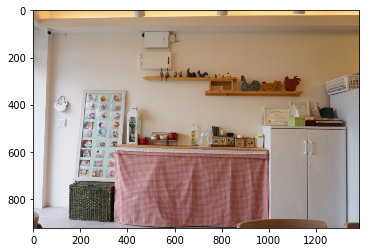

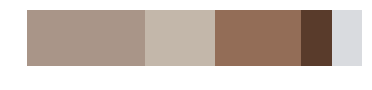

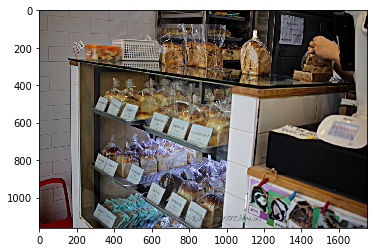

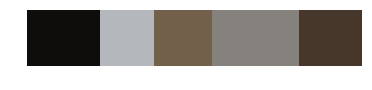

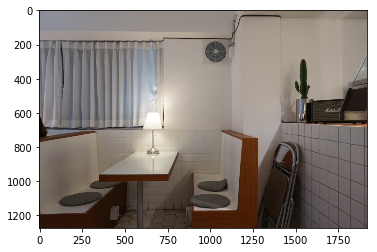

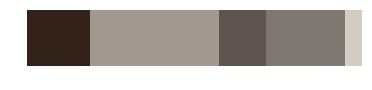

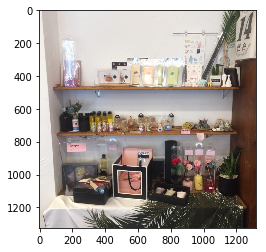

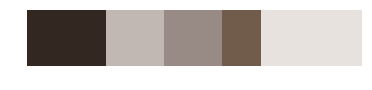

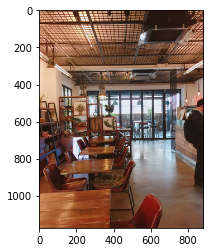

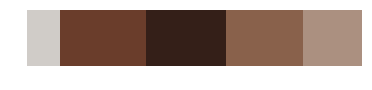

In [8]:
for path in path_list:
    if 'dj' in path:
        image = mpimg.imread(path)
        plt.imshow(image)
        image_color_cluster(path)